# Foundations of AI & ML
## Session 08
### Experiment 2
### Overfitting

Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. 

In this experiment we are going to use 2 features from Iris Dataset to Visualise Overfitting step by step.
  1. Plot training error and Test error
  2. Observe when the overfitting starts in the plot.

You will understand by the end of this Experiment how detail in the data negatively impacts the performance of the model.

In [1]:
## Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Generating the dataset

In [2]:
# Loading iris dataset from sklearn
iris = datasets.load_iris()
## Storing only 2 features 
X = iris.data[:,(0,2)]
## Storing the target data
Y = iris.target

** Exercise 1 ** Split the data into train,test and validation sets.

In [3]:
# np.split?

In [16]:
## Hint : you can use np.split
X_train, X_test, X_validation = np.split(X, [int(.6 * len(X)), int(.8 * len(X))])
Y_train, Y_test, Y_validation = np.split(Y, [int(.6 * len(Y)), int(.8 * len(Y))])

X_train.shape, X_test.shape, X_validation.shape, len(X)

((90, 2), (30, 2), (30, 2), 150)

In [ ]:
# np.linalg.norm?
# np.matmul?

In [4]:
## Linear function
def linf(m, x):
    return np.matmul(x, m)

def one_step(x, y, m, eta):
    #Predicting the values
    ypred = linf(m, x)
    #Calculating the error
    error = np.linalg.norm((y - ypred)**2)
    #calculating the delta value
    delta_m = -2*np.matmul(x.T,(y - ypred))
    #updating m value
    m = m - (delta_m * eta)
    return m, error

**Exercise 2 ** Calculate the test error

In [13]:
def calc_train_test_error(X_train, X_test, Y_train, Y_test):
    num_feat = len(X_train[0]) 
    #Intilizing the m value with random value
    m = np.random.uniform(-1,1,(num_feat+1,1))
    # Learning rate
    eta = 2e-4
    train_errs = []
    test_errs = []
    #reshaping the size of Y_test array
    Y_test = np.reshape(Y_test, (Y_test.shape[0],1))
    #reshaping the size of Y_train array
    Y_train = np.reshape(Y_train, (Y_train.shape[0],1))
    ## adding additional ones to X_train and X_test arrays
    X_train=np.hstack( (X_train,np.ones((X_train.shape[0],1)))) 
    X_test=np.hstack( (X_test,np.ones((X_test.shape[0],1)))) 

    for times in range(50):
        ## Calling the function
        m, error = one_step(X_train, Y_train, m, eta)
        if times%1==0:
            # appending the trained error to train_errs
            train_errs.append(error)
            # Calculating the test errors and appending them to test_errs
            test_errs.append(np.linalg.norm((Y_test - linf(m, X_test))**2))
    
    return train_errs, test_errs


In [12]:
## Plotting the train_errs and test_errs
def plot_train_test_error(train_errs, test_errs):
    plt.plot(train_errs)
    plt.plot(test_errs)
    plt.legend(["Train","Test"])
    plt.show()

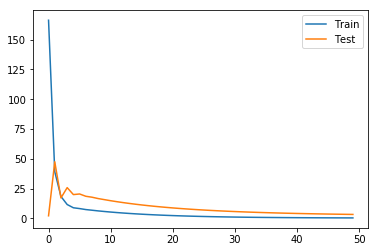

In [21]:
plot_train_test_error(*calc_train_test_error(X_train, X_test, Y_train, Y_test))

In [20]:
print('\nMinimum Training Error occurs at {} degrees.'.format(int(np.argmin(train_errs))))
print('Minimum Testing Error occurs at {} degrees.\n'.format(int(np.argmin(test_errs))))


Minimum Training Error occurs at 49 degrees.
Minimum Testing Error occurs at 15 degrees.



**Exercise 3 **  Vary the train ,test and validation ratios and observe how overfitting changes.

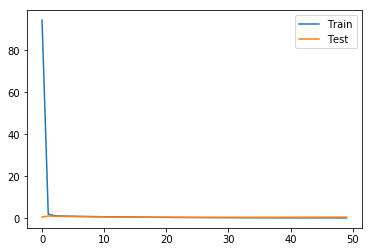

In [22]:
X_train, X_test, X_validation = np.split(X, [int(.5 * len(X)), int(.7 * len(X))])
Y_train, Y_test, Y_validation = np.split(Y, [int(.5 * len(Y)), int(.7 * len(Y))])

plot_train_test_error(*calc_train_test_error(X_train, X_test, Y_train, Y_test))

(90, 2) (45, 2) (15, 2)


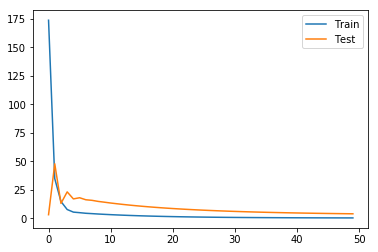

In [28]:
X_train, X_test, X_validation = np.split(X, [int(.6 * len(X)), int(.9 * len(X))])
Y_train, Y_test, Y_validation = np.split(Y, [int(.6 * len(Y)), int(.9 * len(Y))])
print(X_train.shape, X_test.shape, X_validation.shape)
plot_train_test_error(*calc_train_test_error(X_train, X_test, Y_train, Y_test))

(105, 2) (30, 2) (15, 2)


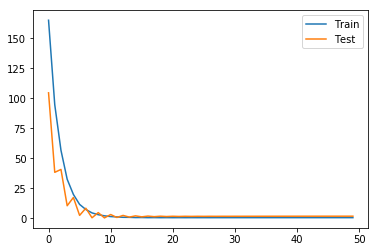

In [29]:
X_train, X_test, X_validation = np.split(X, [int(.7 * len(X)), int(.9 * len(X))])
Y_train, Y_test, Y_validation = np.split(Y, [int(.7 * len(Y)), int(.9 * len(Y))])
print(X_train.shape, X_test.shape, X_validation.shape)
plot_train_test_error(*calc_train_test_error(X_train, X_test, Y_train, Y_test))

(120, 2) (15, 2) (15, 2)


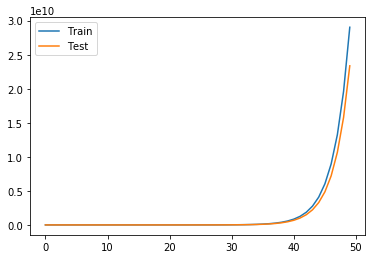

In [30]:
X_train, X_test, X_validation = np.split(X, [int(.8 * len(X)), int(.9 * len(X))])
Y_train, Y_test, Y_validation = np.split(Y, [int(.8 * len(Y)), int(.9 * len(Y))])

print(X_train.shape, X_test.shape, X_validation.shape)
plot_train_test_error(*calc_train_test_error(X_train, X_test, Y_train, Y_test))

We see that the model started overfitting as the train data increased to 80%

**Solutions**

**Exercise 1** 

In [ ]:
X_train, X_test, X_validation = np.split(X, [int(.6 * len(X)), int(.8 * len(X))])
Y_train, Y_test, Y_validation = np.split(Y, [int(.6 * len(Y)), int(.8 * len(Y))])

**Exercise 2 **

In [ ]:
test_errs.append(np.linalg.norm((Y_test - linf(m,X_test))**2))

**Exercise 3 **

In [ ]:
X_train, X_test, X_validation = np.split(X, [int(.5 * len(X)), int(.7 * len(X))])
Y_train, Y_test, Y_validation = np.split(Y, [int(.5 * len(Y)), int(.7 * len(Y))])